Code to integrate P2 and P5 single cell Data with combined dataset(Moorman and Pelka)
We use the integrated dataset we made in the first few weeks

In [2]:
import scanpy as sc
import anndata as ad
import pandas as pd
import bbknn
import scanpy.external as sce
import numpy as np
%matplotlib inline

In [31]:
Moorman_Pelka = sc.read_h5ad("/gpfs/commons/home/slee/innovation/share/etc/Pelka_Moorman_integrated_051625.h5ad")

In [32]:
Moorman_Pelka.obs.head(5)

biosample_id donor_id  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC  C103_T_1_1_0_c1_v2     C103   

                                       SpecimenType TissueSource  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC            T          MGH   

                                       ProcessingMethod PatientTypeID   sex  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC         unsorted        C103_T  male   

                                        Site Grade TumorStage  ...  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC  left   low      notT4  ...   

                                       Module Tumor ISC-like Score ClusterTop  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT                         NaN        Epi   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT                         NaN        Epi   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG                         NaN        Epi   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT                         NaN        Epi   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC                         NaN        Epi   

                                       ClusterMidway  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT          EpiT   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT          EpiT   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG          EpiT   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT          EpiT   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC          EpiT   

                                                             ClusterFull  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT         Tumor cE01 (Stem/TA-like)   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT         Tumor cE01 (Stem/TA-like)   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG  Tumor cE03 (Stem/TA-like prolif)   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT         Tumor cE01 (Stem/TA-like)   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC         Tumor cE01 (Stem/TA-like)   

                                       cancer_subtype        batch  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT            NaN  Pelka_et_al   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT            NaN  Pelka_et_al   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG            NaN  Pelka_et_al   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT            NaN  Pelka_et_al   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC            NaN  Pelka_et_al   

                                       n_counts_all   highlight  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT      14749.0  background   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT       1108.0  background   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG      48728.0  background   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT      15736.0  background   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC      40664.0  background   

                                       cancer_subtype_filtered  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT                     NaN   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT                     NaN   
C103_T_1_1_

In [33]:
Moorman_Pelka.obs["ClusterFull"].value_counts()


ClusterFull
Tumor cE01 (Stem/TA-like)           74560
Tumor cE03 (Stem/TA-like prolif)    44935
cM02 (Macrophage-like)              27653
cM01 (Monocyte)                     24740
cP1 (Plasma IgA)                    20957
                                    ...  
cM08 (AS-DC)                          110
cS20 (Pericyte prolif)                 44
Tumor cE07 (Goblet/Enterocyte)         36
NA                                      0
background                              0
Name: count, Length: 100, dtype: int64

In [34]:
adata_ref = sc.read_h5ad("/gpfs/commons/home/slee/innovation/share/etc/Pelka_Moorman_integrated_051625.h5ad")
adata_flex = sc.read_h5ad("/gpfs/commons/groups/innovation/jjoseph/data/single_cell/integrated_P2_P5_scVI.h5ad") #this is p2 and p5 integrated dataset

In [36]:
adata_ref = sc.read_h5ad("/gpfs/commons/home/slee/innovation/share/etc/Pelka_Moorman_integrated_051625.h5ad")
adata_flex = sc.read_h5ad("/gpfs/commons/groups/innovation/jjoseph/data/single_cell/integrated_P2_P5_scVI.h5ad")

In [37]:
adata_ref.var_names_make_unique()
adata_flex.var_names_make_unique()

In [38]:
adata_flex.obs["donor_id"] = adata_flex.obs["patient_tag"]
print(adata_flex.obs["donor_id"].value_counts())

donor_id
P2CRC    27855
P5CRC    18592
Name: count, dtype: int64


In [39]:
common_genes = adata_ref.var_names.intersection(adata_flex.var_names)
adata_ref = adata_ref[:, common_genes].copy()
adata_flex = adata_flex[:, common_genes].copy()


In [40]:
print(adata_ref.obs.columns)

Index(['biosample_id', 'donor_id', 'SpecimenType', 'TissueSource',
       'ProcessingMethod', 'PatientTypeID', 'sex', 'Site', 'Grade',
       'TumorStage', 'LymphNodeStatus', 'MMRStatusTumor', 'MMRMLH1Tumor',
       'qc_geneCount', 'qc_logMappedReads', 'qc_meanReadsPerUmi',
       'qc_totalReads', 'qc_logUmiCount', 'qc_bcSwapFraction',
       'qc_geneSatFraction', 'qc_seqDupEst', 'qc_umiSatFraction',
       'qc_emptyDropPval', 'qc_mitoFraction', 'species',
       'species__ontology_label', 'disease', 'disease__ontology_label',
       'organ', 'organ__ontology_label', 'library_preparation_protocol',
       'library_preparation_protocol__ontology_label', 'total_counts',
       'log1p_total_counts', 'Sample ID', 'PhenoGraph_clusters', 'Patient',
       'Primary Site', 'Sample Type', 'Treatment', 'Cell Compartment',
       'PhenoGraph Classification', 'Cell State', 'P(ISC)', 'P(Squamous)',
       'P(Fetal)', 'P(Absorptive)', 'P(Proliferative)', 'P(Neuroendocrine)',
       'P(Secretory)', '

In [41]:
# Step 1: Scale and run PCA on flex data (you did this correctly)
sc.pp.scale(adata_flex)
sc.tl.pca(adata_flex)

# ✅ Step 2: NOW also run PCA on reference data
sc.tl.pca(adata_ref)  # <-- THIS is the missing step

# Step 3: Build neighbor graph on reference
sc.pp.neighbors(adata_ref)

# Step 4: Ingest flex cells into reference
sc.tl.ingest(adata_flex, adata_ref, obs=["ClusterTop", "ClusterMidway", "ClusterFull"])

# Step 5: Confirm that ingest actually transferred the labels
print(adata_flex.obs["ClusterFull"].value_counts(dropna=False))
print(adata_flex.obs[["ClusterTop", "ClusterMidway", "ClusterFull"]].isnull().mean())
print(adata_merged.obs["ClusterFull"].value_counts(dropna=False))


/gpfs/commons/groups/innovation/jjoseph/enact_results/integrate_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/nfs/home/jjoseph/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ClusterFull
Tumor cE01 (Stem/TA-like)           12833
cM02 (Macrophage-like)               4222
cP2 (Plasma IgG)                     3426
cTNI11 (CD8+GZMK+)                   2587
Tumor cE03 (Stem/TA-like prolif)     2224
                                    ...  
Tumor cE07 (Goblet/Enterocyte)          0
cS04 (Endo)                             0
cS20 (Pericyte prolif)                  0
cM08 (AS-DC)                            0
cS23 (Fibro BMP-producing)              0
Name: count, Length: 98, dtype: int64
ClusterTop       0.0
ClusterMidway    0.0
ClusterFull      0.0
dtype: float64
ClusterFull
Tumor cE01 (Stem/TA-like)           93689
Tumor cE03 (Stem/TA-like prolif)    46822
cM02 (Macrophage-like)              31784
cM01 (Monocyte)                     26351
cP1 (Plasma IgA)                    21139
                                    ...  
cS14 (Endo)                           200
cS07 (Endo capillary-like)            134
cM08 (AS-DC)                          110
cS20 (Pericyte proli

In [42]:
adata_merged = sc.concat(
    [adata_ref, adata_flex],
    label="source", 
    keys=["reference", "flex"],
    join="outer"
)

/gpfs/commons/groups/innovation/jjoseph/enact_results/integrate_env/lib/python3.10/site-packages/anndata/_core/merge.py:1434: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [43]:
print(adata_merged.obs["donor_id"].value_counts())


donor_id
P2CRC     27855
C162      22587
P5CRC     18592
C124      16945
C171      16199
          ...  
KG60M       226
KG184N      153
KG188N      152
KG194N      151
KG182P      118
Name: count, Length: 153, dtype: int64


In [44]:
import scanpy.external as sce

sc.pp.pca(adata_merged)
sce.pp.harmony_integrate(adata_merged, key="donor_id")


2025-07-20 23:42:23,589 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-20 23:42:42,073 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-20 23:42:43,126 - harmonypy - INFO - Iteration 1 of 10
2025-07-20 23:46:08,939 - harmonypy - INFO - Iteration 2 of 10
2025-07-20 23:49:35,058 - harmonypy - INFO - Iteration 3 of 10
2025-07-20 23:52:59,610 - harmonypy - INFO - Iteration 4 of 10
2025-07-20 23:55:09,990 - harmonypy - INFO - Iteration 5 of 10
2025-07-20 23:57:13,246 - harmonypy - INFO - Converged after 5 iterations


In [45]:
sc.pp.neighbors(adata_merged, use_rep="X_pca_harmony")
sc.tl.umap(adata_merged)


In [46]:
adata_merged.write("flex_pelka_moorman_harmony_donor_integrated.h5ad")

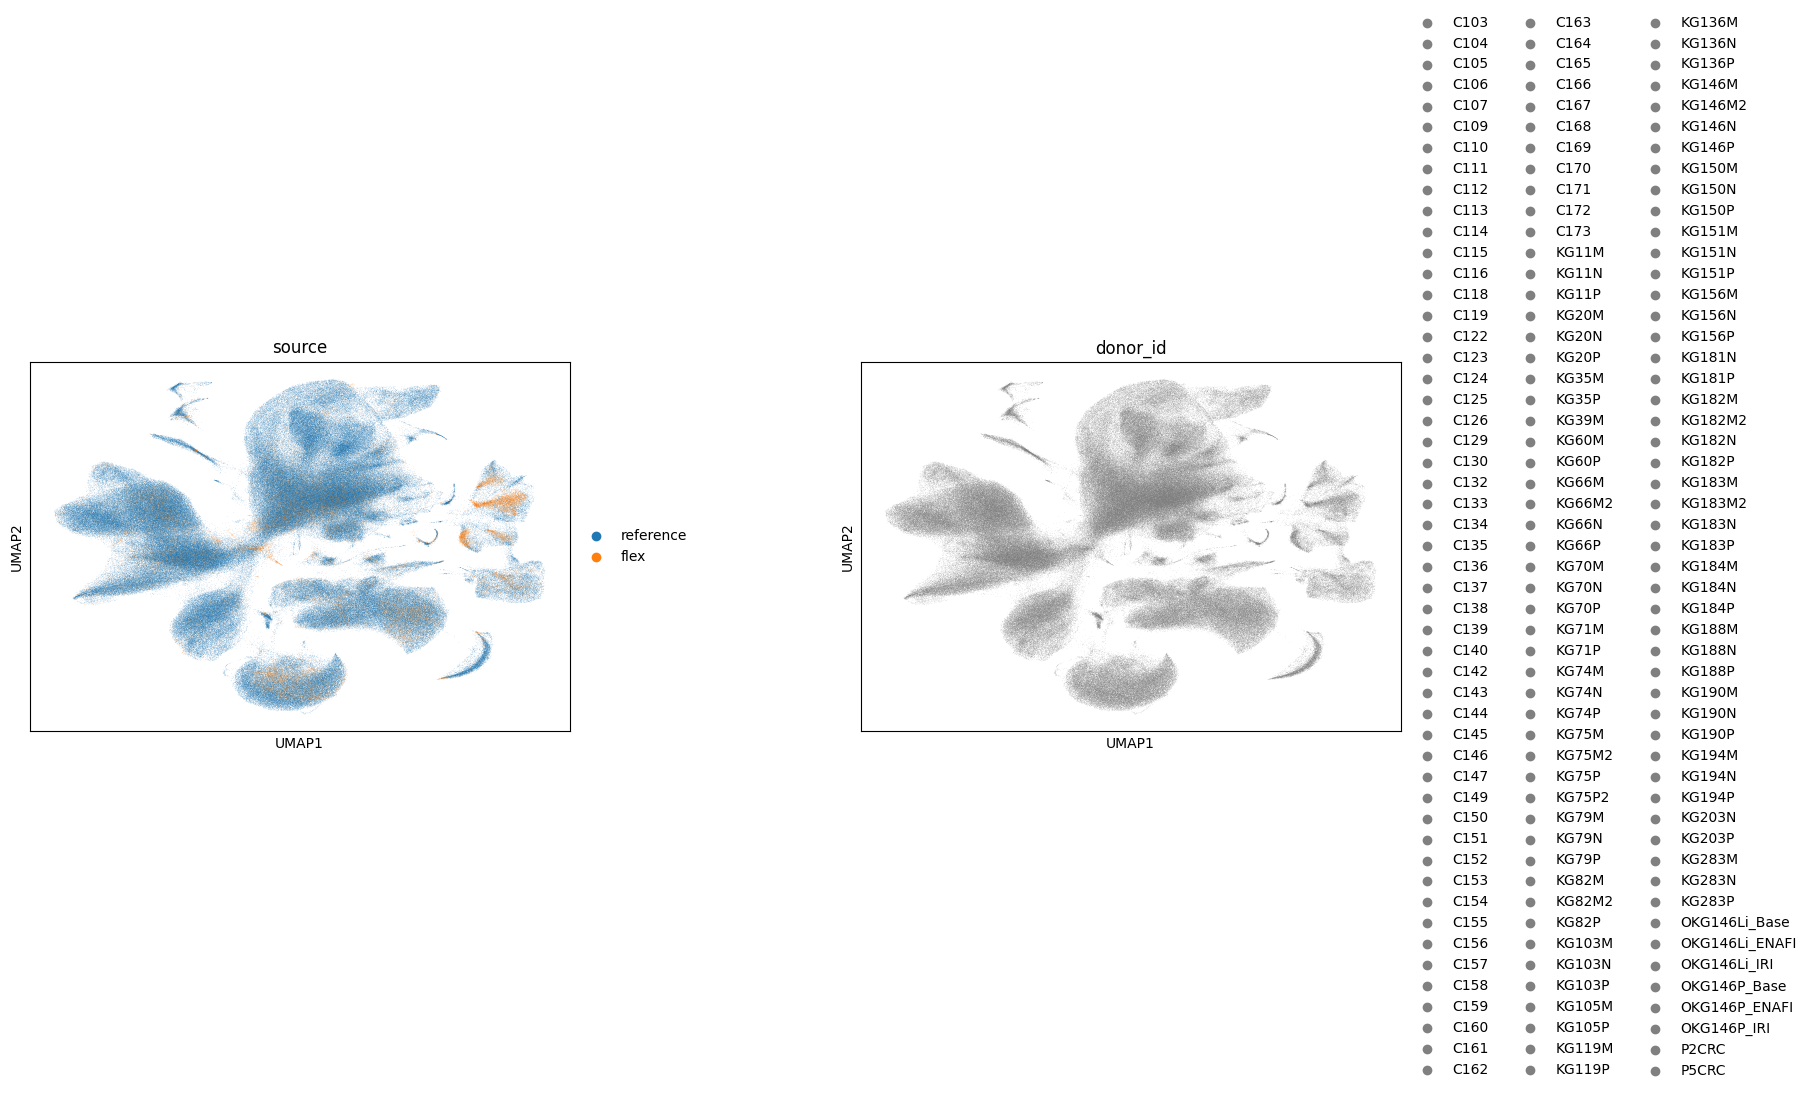

In [47]:
import matplotlib.pyplot as plt

sc.pl.umap(
    adata_merged, 
    color=["source", "donor_id"], 
    wspace=0.4
)
plt.show()

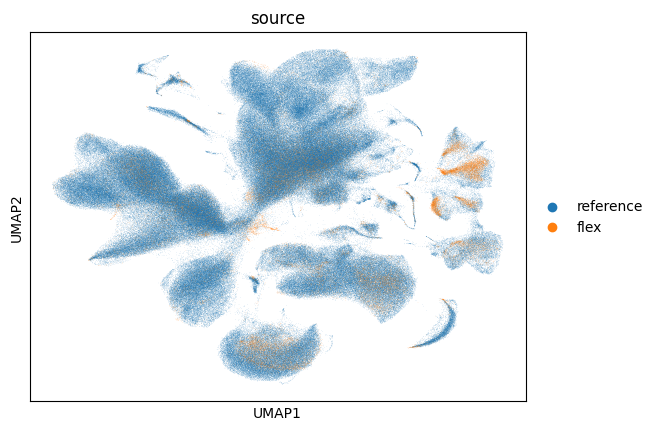

In [21]:
import scanpy as sc
sc.pl.umap(adata_merged, color="source")

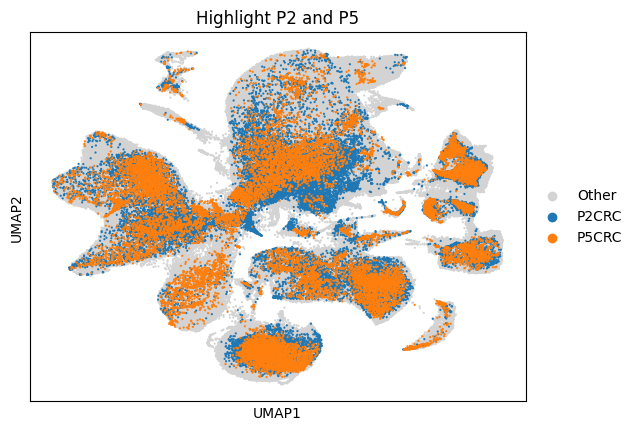

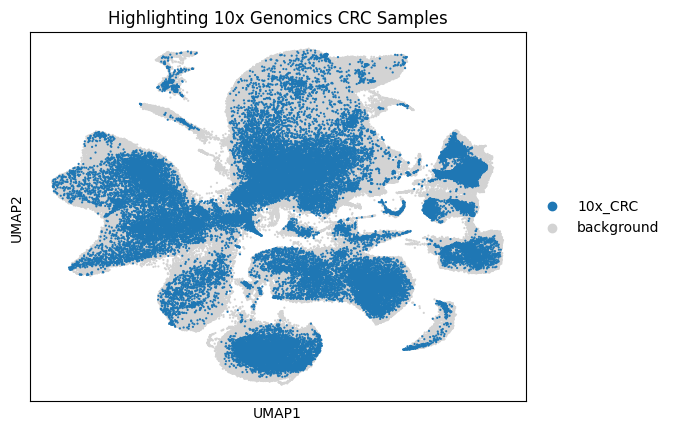

In [73]:
adata_merged.obs["highlight"] = adata_merged.obs["donor_id"].astype(str).where(
    adata_merged.obs["donor_id"].isin(["P2CRC", "P5CRC"]),
    "Other"
)

sc.pl.umap(
    adata_merged,
    color="highlight",
    palette={"P2CRC": "#1f77b4", "P5CRC": "#ff7f0e", "Other": "#d3d3d3"},
    size=10,
    title="Highlight P2 and P5"
)

adata_merged.obs["highlight"] = np.where(
    adata_merged.obs["donor_id"].isin(["P2CRC", "P5CRC"]),
    "10x_CRC",
    "background"
)

adata_merged.obs["highlight"] = pd.Categorical(
    adata_merged.obs["highlight"],
    categories=["10x_CRC", "background"]
)

# Plot
sc.pl.umap(
    adata_merged,
    color="highlight",
    size=10,
    palette={
        "10x_CRC": "#1f77b4",
        "background": "#d3d3d3"
    },
    title="Highlighting 10x Genomics CRC Samples"
)


[<Axes: title={'center': 'ClusterTop (Pelka Moore Data Only)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'ClusterMidway (Pelka Moore Data Only)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'ClusterFull (Pelka Moore Data Only)'}, xlabel='UMAP1', ylabel='UMAP2'>]

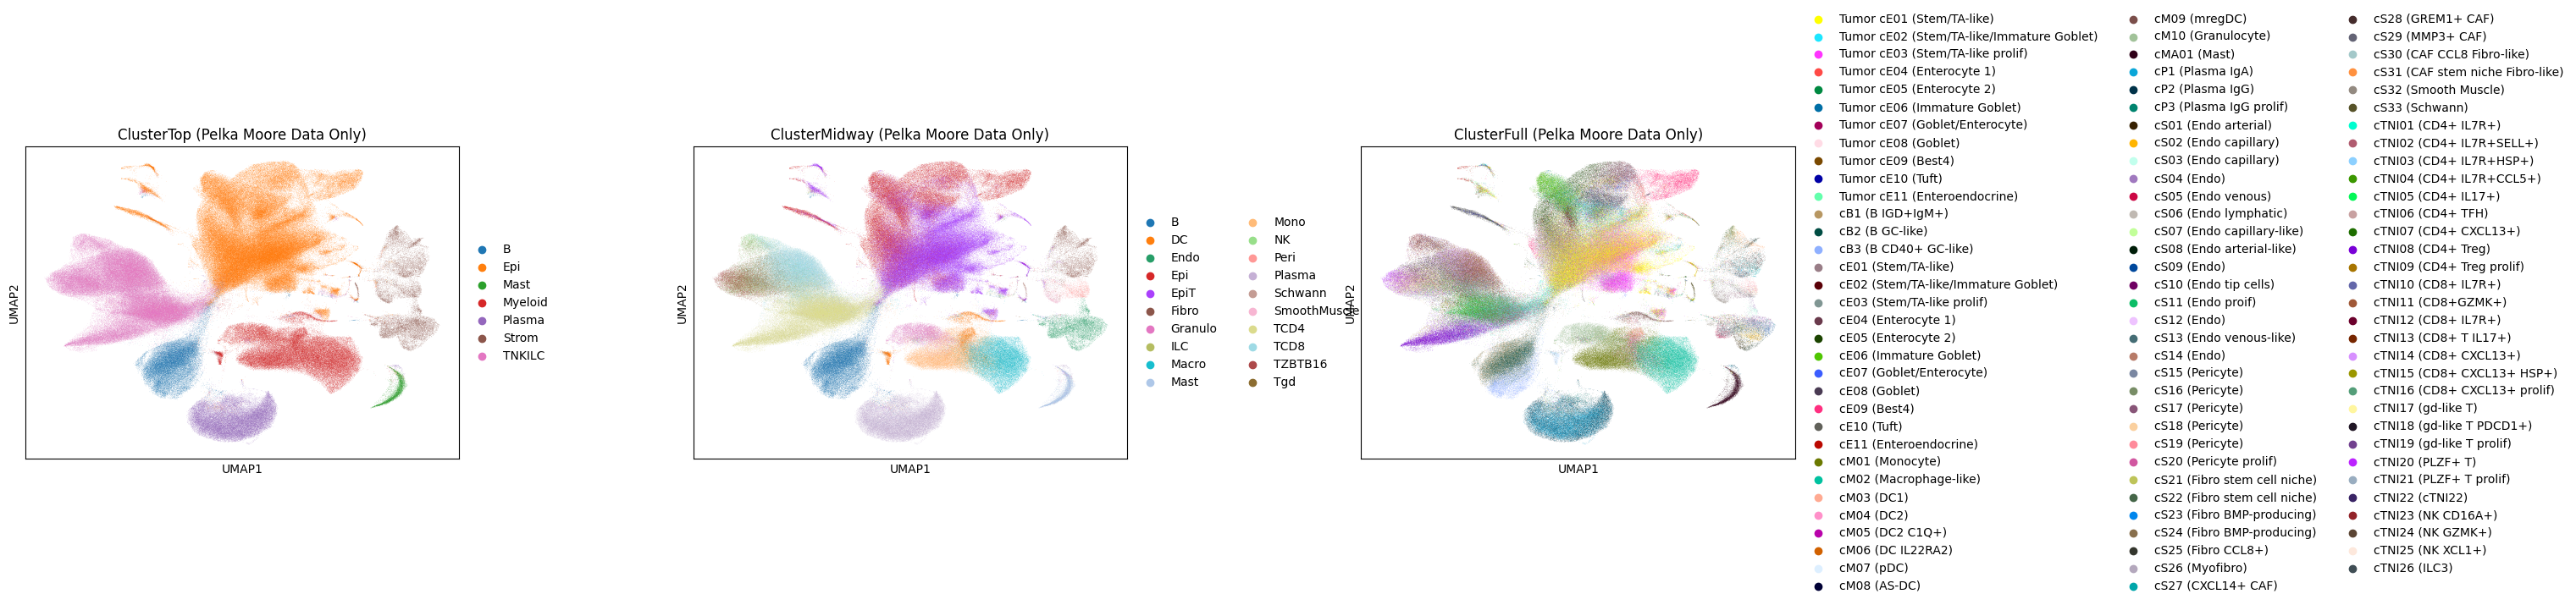

In [173]:
adata_reference_only = adata_merged[~adata_merged.obs["donor_id"].isin(["P2CRC", "P5CRC"])].copy()
import matplotlib.pyplot as plt

sc.pl.umap(
    adata_reference_only,
    title=["ClusterTop (Pelka Moore Data Only)", "ClusterMidway (Pelka Moore Data Only)", "ClusterFull (Pelka Moore Data Only)"],
    color=["ClusterTop", "ClusterMidway", "ClusterFull"],
    wspace=0.4,
    show=False  
)



In [68]:
print("P2/P5 cells present in UMAP?")
print("P2CRC:", "P2CRC" in adata_merged.obs["donor_id"].unique())
print("P5CRC:", "P5CRC" in adata_merged.obs["donor_id"].unique())

print("UMAP present:", "X_umap" in adata_merged.obsm)
print("UMAP shape:", adata_merged.obsm["X_umap"].shape)


P2/P5 cells present in UMAP?
P2CRC: True
P5CRC: True
UMAP present: True
UMAP shape: (590650, 2)


In [69]:
adata_flex.obs["batch"] = adata_flex.obs["patient_tag"].where(
    adata_flex.obs["patient_tag"].isin(["P2CRC", "P5CRC"]),
    "Other"
)

adata_flex.obs["batch"] = adata_flex.obs["batch"].replace({
    "P2CRC": "10x Genomics Public CRC",
    "P5CRC": "10x Genomics Public CRC"
})


/tmp/ipykernel_1578681/3750345433.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_flex.obs["batch"] = adata_flex.obs["batch"].replace({


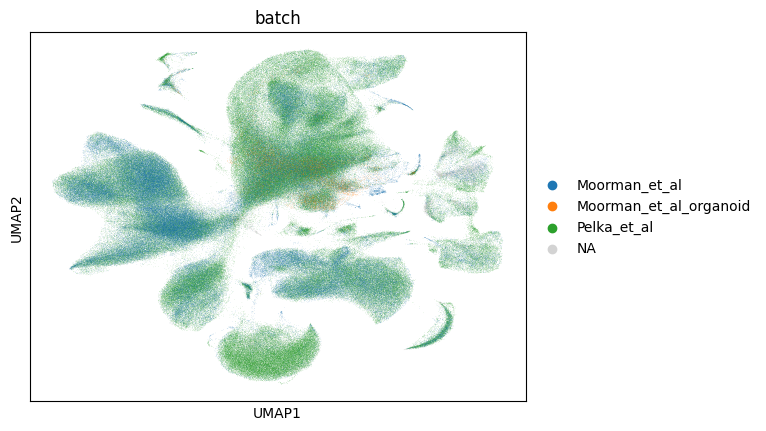

In [118]:
import matplotlib.pyplot as plt

sc.pl.umap(adata_merged, color=['batch'], show=False)  # Don't display yet
plt.savefig("umap.png", bbox_inches='tight', dpi=300)
plt.show()


In [71]:
# Assign a new 'source' column to group P2/P5 under a common label
adata_merged.obs["source"] = "Reference"
adata_merged.obs.loc[
    adata_merged.obs["donor_id"].isin(["P2CRC", "P5CRC"]),
    "source"
] = "10x_Genomics_CRC"


# Assign source labels
adata_merged.obs.loc[
    adata_merged.obs["batch"] == "Pelka_et_al",
    "source"
] = "Pelka_et_al"

adata_merged.obs.loc[
    adata_merged.obs["batch"] == "Moorman_et_al",
    "source"
] = "Moorman_et_al"

adata_merged.obs.loc[
    adata_merged.obs["batch"] == "Moorman_et_al_organoid",
    "source"
] = "Moorman_et_al_organoid"

# Assign source for 10x Genomics data based on donor_id
adata_merged.obs.loc[
    adata_merged.obs["donor_id"].isin(["P2CRC", "P5CRC"]),
    "source"
] = "10x_Genomics_CRC"


In [72]:
adata_merged.obs

biosample_id donor_id  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC  C103_T_1_1_0_c1_v2     C103   
...                                                    ...      ...   
TTTGGACGTCCAGCACAGTAGGCT-23                            NaN    P5CRC   
TTTGGCGGTGAAGCACAGTAGGCT-23                            NaN    P5CRC   
TTTGGCGGTGCATTACAGTAGGCT-23                            NaN    P5CRC   
TTTGGCGGTGCGTACCAGTAGGCT-23                            NaN    P5CRC   
TTTGTGAGTACTTAGCAGTAGGCT-23                            NaN    P5CRC   

                                       SpecimenType TissueSource  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC            T          MGH   
...                                             ...          ...   
TTTGGACGTCCAGCACAGTAGGCT-23                     NaN          NaN   
TTTGGCGGTGAAGCACAGTAGGCT-23                     NaN          NaN   
TTTGGCGGTGCATTACAGTAGGCT-23                     NaN          NaN   
TTTGGCGGTGCGTACCAGTAGGCT-23                     NaN          NaN   
TTTGTGAGTACTTAGCAGTAGGCT-23                     NaN          NaN   

                                       ProcessingMethod PatientTypeID   sex  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC         unsorted        C103_T  male   
...                                                 ...           ...   ...   
TTTGGACGTCCAGCACAGTAGGCT-23                         NaN           NaN   NaN   
TTTGGCGGTGAAGCACAGTAGGCT-23                         NaN           NaN   NaN   
TTTGGCGGTGCATTACAGTAGGCT-23                         NaN           NaN   NaN   
TTTGGCGGTGCGTACCAGTAGGCT-23                         NaN           NaN   NaN   
TTTGTGAGTACTTAGCAGTAGGCT-23                         NaN           NaN   NaN   

                                        Site Grade TumorStage  ...  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC  left   low      notT4  ...   
...                                      ...   ...        ...  ...   
TTTGGACGTCCAGCACAGTAGGCT-23              NaN   NaN        NaN  ...   
TTTGGCGGTGAAGCACAGTAGGCT-23              NaN   NaN        NaN  ...   
TTTGGCGGTGCATTACAGTAGGCT-23              NaN   NaN        NaN  ...   
TTTGGCGGTGCGTACCAGTAGGCT-23              NaN   NaN        NaN  ...   
TTTGTGAGTACTTAGCAGTAGGCT-23              NaN   NaN        NaN  ...   

                                       _scvi_labels doublet n_genes_by_counts  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT          NaN    <NA>               NaN   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT          NaN    <NA>               NaN   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG          NaN    <NA>               NaN   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT          NaN    <NA>               NaN   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC          NaN    <NA>               NaN   
...                                             ...     ...               ...   
TTTGGACGTCCAGCACAGT

In [51]:
adata_merged = sc.read_h5ad("flex_pelka_moorman_harmony_donor_integrated.h5ad")

In [60]:
adata_merged.obs

biosample_id donor_id  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT  C103_T_1_1_0_c1_v2     C103   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC  C103_T_1_1_0_c1_v2     C103   
...                                                    ...      ...   
TTTGGACGTCCAGCACAGTAGGCT-23                            NaN    P5CRC   
TTTGGCGGTGAAGCACAGTAGGCT-23                            NaN    P5CRC   
TTTGGCGGTGCATTACAGTAGGCT-23                            NaN    P5CRC   
TTTGGCGGTGCGTACCAGTAGGCT-23                            NaN    P5CRC   
TTTGTGAGTACTTAGCAGTAGGCT-23                            NaN    P5CRC   

                                       SpecimenType TissueSource  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC            T          MGH   
...                                             ...          ...   
TTTGGACGTCCAGCACAGTAGGCT-23                     NaN          NaN   
TTTGGCGGTGAAGCACAGTAGGCT-23                     NaN          NaN   
TTTGGCGGTGCATTACAGTAGGCT-23                     NaN          NaN   
TTTGGCGGTGCGTACCAGTAGGCT-23                     NaN          NaN   
TTTGTGAGTACTTAGCAGTAGGCT-23                     NaN          NaN   

                                       ProcessingMethod PatientTypeID   sex  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC         unsorted        C103_T  male   
...                                                 ...           ...   ...   
TTTGGACGTCCAGCACAGTAGGCT-23                         NaN           NaN   NaN   
TTTGGCGGTGAAGCACAGTAGGCT-23                         NaN           NaN   NaN   
TTTGGCGGTGCATTACAGTAGGCT-23                         NaN           NaN   NaN   
TTTGGCGGTGCGTACCAGTAGGCT-23                         NaN           NaN   NaN   
TTTGTGAGTACTTAGCAGTAGGCT-23                         NaN           NaN   NaN   

                                        Site Grade TumorStage  ...  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC  left   low      notT4  ...   
...                                      ...   ...        ...  ...   
TTTGGACGTCCAGCACAGTAGGCT-23              NaN   NaN        NaN  ...   
TTTGGCGGTGAAGCACAGTAGGCT-23              NaN   NaN        NaN  ...   
TTTGGCGGTGCATTACAGTAGGCT-23              NaN   NaN        NaN  ...   
TTTGGCGGTGCGTACCAGTAGGCT-23              NaN   NaN        NaN  ...   
TTTGTGAGTACTTAGCAGTAGGCT-23              NaN   NaN        NaN  ...   

                                       _scvi_labels doublet n_genes_by_counts  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT          NaN    <NA>               NaN   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT          NaN    <NA>               NaN   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG          NaN    <NA>               NaN   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT          NaN    <NA>               NaN   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC          NaN    <NA>               NaN   
...                                             ...     ...               ...   
TTTGGACGTCCAGCACAGT

In [62]:
adata_merged.obs[["ClusterFull", "ClusterTop", "ClusterMidway"]].head()


ClusterFull  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT         Tumor cE01 (Stem/TA-like)   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT         Tumor cE01 (Stem/TA-like)   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG  Tumor cE03 (Stem/TA-like prolif)   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT         Tumor cE01 (Stem/TA-like)   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC         Tumor cE01 (Stem/TA-like)   

                                       ClusterTop ClusterMidway  
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT        Epi          EpiT  
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT        Epi          EpiT  
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG        Epi          EpiT  
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT        Epi          EpiT  
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC        Epi          EpiT

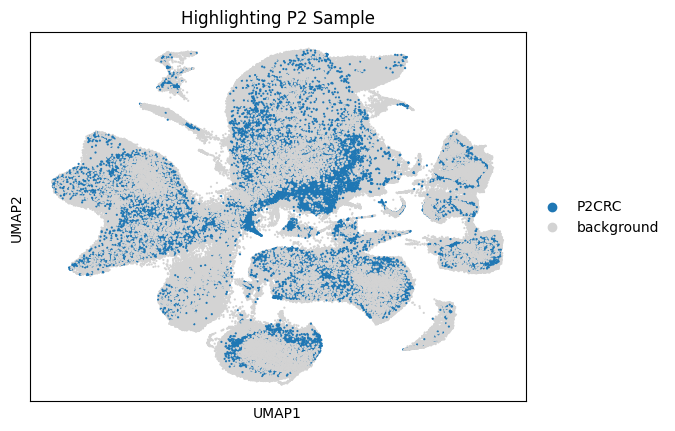

In [75]:
adata_merged.obs["highlight"] = np.where(
    adata_merged.obs["donor_id"] == "P2CRC",  # Highlight P2
    "P2CRC",
    "background"
)
sc.pl.umap(
    adata_merged,
    color="highlight",
    palette={
        "P2CRC": "#1f77b4",       # Blue for P2
        "background": "#d3d3d3"   # Light gray for the rest
    },
    size=10,
    title="Highlighting P2 Sample"
)


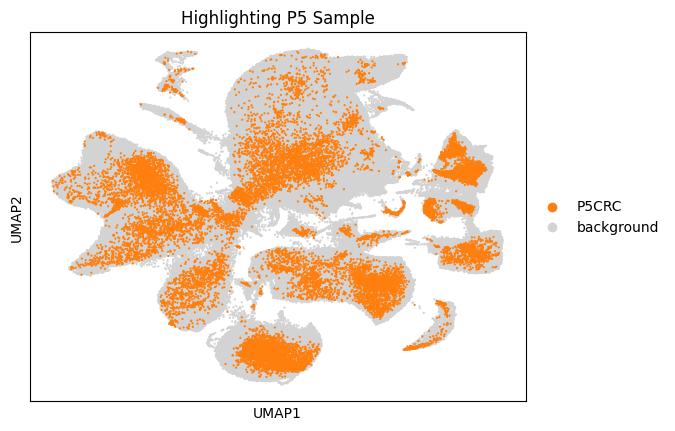

In [78]:
adata_merged.obs["highlight"] = np.where(
    adata_merged.obs["donor_id"] == "P5CRC",
    "P5CRC",
    "background"
)

sc.pl.umap(
    adata_merged,
    color="highlight",
    palette={
        "P5CRC": "#ff7f0e",       # Orange for P5
        "background": "#d3d3d3"   # Light gray for everything else
    },
    size=10,
    title="Highlighting P5 Sample"
)


In [79]:
adata_merged.obs["batch"].value_counts()


batch
Pelka_et_al               370115
Moorman_et_al             164304
Moorman_et_al_organoid      9784
Name: count, dtype: int64

In [80]:
adata_merged.obs["source"].value_counts()


source
Pelka_et_al               370115
Moorman_et_al             164304
10x_Genomics_CRC           46447
Moorman_et_al_organoid      9784
Name: count, dtype: int64

In [82]:
p2_count = (adata_merged.obs["donor_id"] == "P2CRC").sum()
p5_count = (adata_merged.obs["donor_id"] == "P5CRC").sum()
print("P2 cells:", p2_count)
print("P5 cells:", p5_count)


P2 cells: 27855
P5 cells: 18592


<Axes: title={'center': 'Single Cell Atlas CRC'}, xlabel='UMAP1', ylabel='UMAP2'>

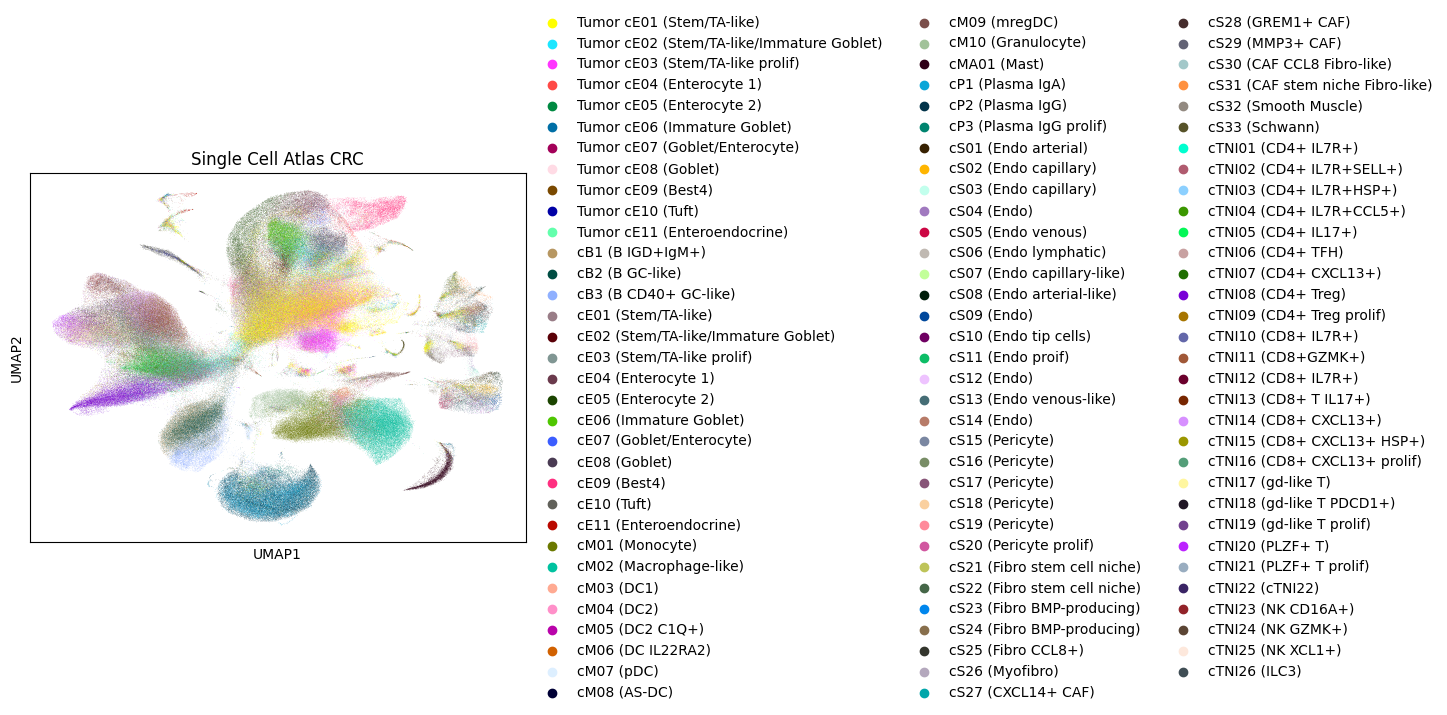

In [107]:
sc.pl.umap(
    adata_merged,
    title=["Single Cell Atlas CRC"],
    color=[ "ClusterFull"],
    wspace=0.4,
    show=False  
)

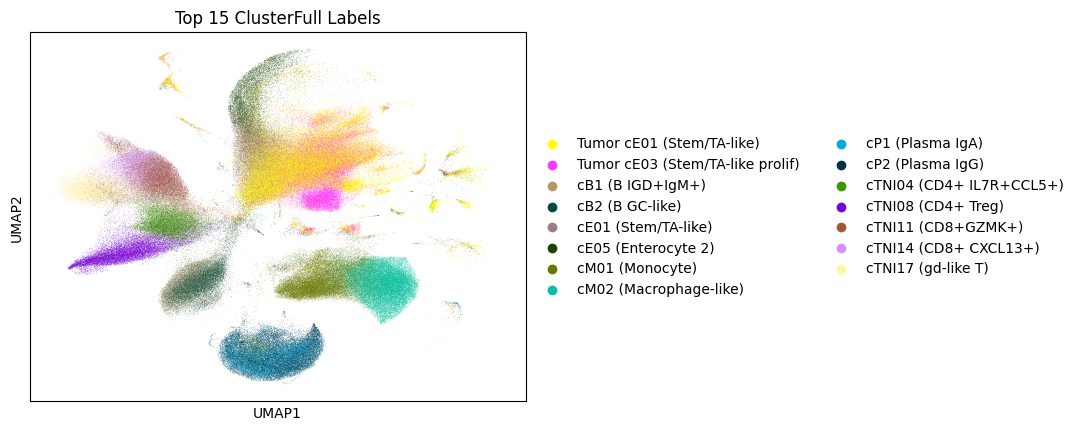

In [92]:
top_clusters = adata_merged.obs["ClusterFull"].value_counts().head(15).index
subset = adata_merged[adata_merged.obs["ClusterFull"].isin(top_clusters)]
sc.pl.umap(subset, color="ClusterFull", title="Top 15 ClusterFull Labels")


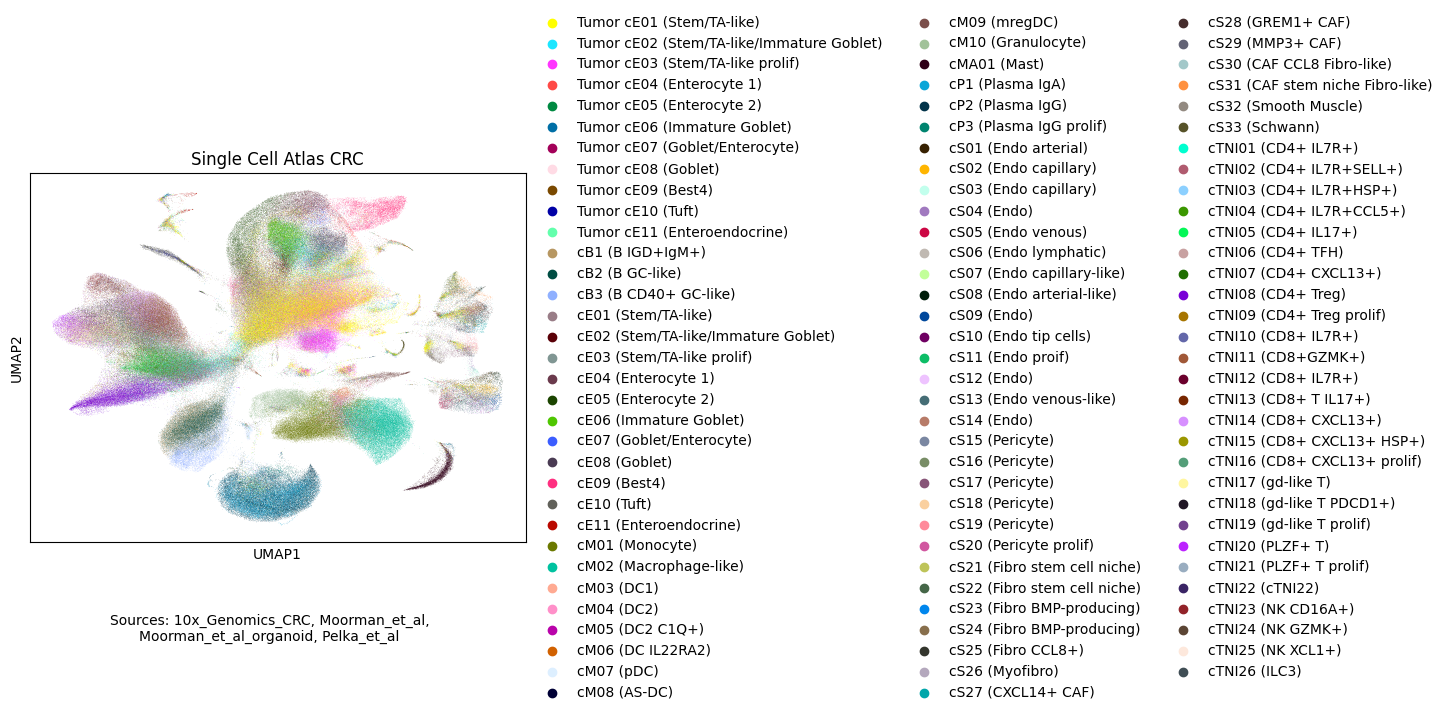

In [114]:
import matplotlib.pyplot as plt
import scanpy as sc

sc.pl.umap(
    adata_merged,
    title=["Single Cell Atlas CRC"],
    color=["ClusterFull"],
    wspace=0.4,
    show=False
)

plt.gcf().text(
    0.5, -0.07,
    'Sources: 10x_Genomics_CRC, Moorman_et_al,\nMoorman_et_al_organoid, Pelka_et_al',
    ha='center', va='center', fontsize=10
)
plt.savefig("umap_with_sources.png", bbox_inches='tight', dpi=300)
# Show the updated plot
plt.show()
